# Goals

- The main goal of this project is to make a prediction of stock prices of PETR4.
- Additionally, I would like to work with 2-month predictions in order to figure out a way to find out nice opportunities for options on this stock. PETR4 options are amidst the most traded in the world.
- An extension to this project would be to build a bot to trade this stock.

## How

- First I'm going to make use of time series with the daily stock prices, probably LSTM or bidirectional LSTM, which are the most relevant. 
- Maybe I could try to put another variable like international price of oil or other oil stocks.

# Getting Data

In [4]:
#!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
papel = yf.Ticker('PETR4.SA')
papel

yfinance.Ticker object <PETR4.SA>

In [4]:
dados= papel.history(start= '2007-01-01', end='2022-12-29')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3966 entries, 2007-01-02 00:00:00-02:00 to 2022-12-28 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3966 non-null   float64
 1   High          3966 non-null   float64
 2   Low           3966 non-null   float64
 3   Close         3966 non-null   float64
 4   Volume        3966 non-null   int64  
 5   Dividends     3966 non-null   float64
 6   Stock Splits  3966 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 247.9 KB


# Exploratory Analysis

In [6]:
# Close price through the years

<AxesSubplot:xlabel='Date'>

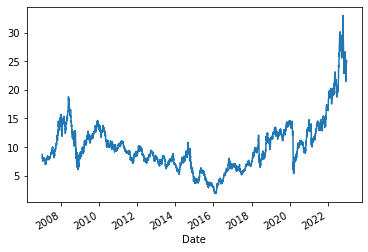

In [7]:
dados['Close'].plot()

In [8]:
# dividend distribution

In [9]:
div=dados[['Dividends']]
div=div[div['Dividends']>0]
div.head()

,Dividends
Date,
2007-01-02 00:00:00-02:00,0.2250
2007-04-03 00:00:00-03:00,0.1750
2007-08-20 00:00:00-03:00,0.2517
2007-10-08 00:00:00-03:00,0.2565
2008-01-14 00:00:00-02:00,0.1553


In [10]:
div.index

DatetimeIndex(['2007-01-02 00:00:00-02:00', '2007-04-03 00:00:00-03:00',
               '2007-08-20 00:00:00-03:00', '2007-10-08 00:00:00-03:00',
               '2008-01-14 00:00:00-02:00', '2008-04-07 00:00:00-03:00',
               '2008-12-29 00:00:00-02:00', '2009-04-09 00:00:00-03:00',
               '2009-07-06 00:00:00-03:00', '2009-10-01 00:00:00-03:00',
               '2009-12-21 00:00:00-02:00', '2010-04-23 00:00:00-03:00',
               '2010-05-24 00:00:00-03:00', '2010-08-02 00:00:00-03:00',
               '2010-11-03 00:00:00-02:00', '2010-12-22 00:00:00-02:00',
               '2011-03-22 00:00:00-03:00', '2011-04-29 00:00:00-03:00',
               '2011-05-12 00:00:00-03:00', '2011-08-03 00:00:00-03:00',
               '2011-11-14 00:00:00-02:00', '2012-01-03 00:00:00-02:00',
               '2012-03-20 00:00:00-03:00', '2012-05-14 00:00:00-03:00',
               '2013-04-30 00:00:00-03:00', '2014-04-03 00:00:00-03:00',
               '2018-05-22 00:00:00-03:00', '2018-0

In [11]:
#for date in div.index:
    #print(date)

In [12]:
div.index[0]

Timestamp('2007-01-02 00:00:00-0200', tz='America/Sao_Paulo')

In [13]:
dados.index.get_loc(div.index[2])

157

In [14]:
dados.index.get_loc('2007-08-20 00:00:00-03:00')

157

In [15]:
dados.iloc[157]

Open            8.221954e+00
High            8.241329e+00
Low             8.031729e+00
Close           8.149739e+00
Volume          2.473800e+07
Dividends       2.517000e-01
Stock Splits    0.000000e+00
Name: 2007-08-20 00:00:00-03:00, dtype: float64

In [16]:
locations_div=[]
for data in div.index:
    locations_div.append(dados.index.get_loc(data))

In [17]:
close_div=[]
for loc in locations_div:
    close_div.append(dados.iloc[loc]['Close'])

In [18]:
div['Price']=close_div

In [19]:
div['DY']=div['Dividends']/div['Price']

In [20]:
div

,Dividends,Price,DY
Date,,,
2007-01-02 00:00:00-02:00,0.225000,8.701063,0.025859
2007-04-03 00:00:00-03:00,0.175000,7.908743,0.022127
2007-08-20 00:00:00-03:00,0.251700,8.149739,0.030884
2007-10-08 00:00:00-03:00,0.256500,10.987376,0.023345
2008-01-14 00:00:00-02:00,0.155300,14.462685,0.010738
2008-04-07 00:00:00-03:00,0.102600,14.037210,0.007309
2008-12-29 00:00:00-02:00,0.042600,8.069037,0.005279
2009-04-09 00:00:00-03:00,0.351600,11.181713,0.031444
2009-07-06 00:00:00-03:00,0.300000,10.998056,0.027278


<AxesSubplot:xlabel='Date'>

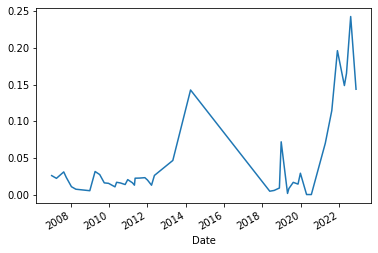

In [21]:
div['DY'].plot()

In [22]:
#!git add .
#!git commit -m 'petro analysis'
#!git push origin main

# Prediction

- Lets try to use LSTM to predict the price of stocks

In [26]:
dados[['Close']].shape

(3966, 1)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM


In [37]:
def initialize_model():
    model = Sequential()
    model.add(SimpleRNN(units=20,activation='tanh',input_shape=(3966, 1)))
    model.add(Dense(10,activation='tanh'))
    model.add(Dense(1,activation='linear'))
    
    return model

In [38]:
model=initialize_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [39]:
def compile_model(model):
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    return model

In [41]:
model=compile_model(model)

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

model = compile_model(initialize_model())

model.fit(X_train,y_train, batch_size=32, epochs=30,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)]
)


# Data Preprocessing

In [61]:
#https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [148]:
import math
from sklearn.preprocessing import MinMaxScaler 
import numpy as np

close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [46]:
values.shape

(3966,)

In [47]:
training_data_len

3173

In [49]:
train_data.shape

(3173, 1)

In [51]:
x_train.shape

(3113, 60, 1)

In [63]:
y_train.shape

(3113,)

In [69]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.219897,0.211405,0.205355,0.197306,0.200304,0.192366,0.191756,0.191367,0.191534,0.189758,...,0.164835,0.168776,0.173161,0.181154,0.184817,0.186205,0.188425,0.187093,0.185928,0.197473
1,0.211405,0.205355,0.197306,0.200304,0.192366,0.191756,0.191367,0.191534,0.189758,0.186427,...,0.168776,0.173161,0.181154,0.184817,0.186205,0.188425,0.187093,0.185928,0.197473,0.197140
2,0.205355,0.197306,0.200304,0.192366,0.191756,0.191367,0.191534,0.189758,0.186427,0.185151,...,0.173161,0.181154,0.184817,0.186205,0.188425,0.187093,0.185928,0.197473,0.197140,0.196030
3,0.197306,0.200304,0.192366,0.191756,0.191367,0.191534,0.189758,0.186427,0.185151,0.181209,...,0.181154,0.184817,0.186205,0.188425,0.187093,0.185928,0.197473,0.197140,0.196030,0.194464
4,0.200304,0.192366,0.191756,0.191367,0.191534,0.189758,0.186427,0.185151,0.181209,0.192255,...,0.184817,0.186205,0.188425,0.187093,0.185928,0.197473,0.197140,0.196030,0.194464,0.197036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,0.348362,0.347324,0.348065,0.348510,0.345990,0.339172,0.328055,0.331612,0.329537,0.327165,...,0.354404,0.353807,0.352164,0.351566,0.339764,0.340063,0.336627,0.331548,0.329307,0.336776
3109,0.347324,0.348065,0.348510,0.345990,0.339172,0.328055,0.331612,0.329537,0.327165,0.329685,...,0.353807,0.352164,0.351566,0.339764,0.340063,0.336627,0.331548,0.329307,0.336776,0.340063
3110,0.348065,0.348510,0.345990,0.339172,0.328055,0.331612,0.329537,0.327165,0.329685,0.333687,...,0.352164,0.351566,0.339764,0.340063,0.336627,0.331548,0.329307,0.336776,0.340063,0.347831
3111,0.348510,0.345990,0.339172,0.328055,0.331612,0.329537,0.327165,0.329685,0.333687,0.319309,...,0.351566,0.339764,0.340063,0.336627,0.331548,0.329307,0.336776,0.340063,0.347831,0.348578


In [68]:
import pandas as pd
pd.DataFrame(y_train)

,0
0,0.197140
1,0.196030
2,0.194464
3,0.197036
4,0.198994
...,...
3108,0.340063
3109,0.347831
3110,0.348578
3111,0.352911


## test set

In [149]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [111]:
scaled_data.shape

(3966, 1)

In [110]:
test_data.shape

(853, 1)

In [109]:
x_test.shape

(793, 60, 1)

In [150]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=3)

Epoch 1/3
98/98 [==============================] - 18s 134ms/step - loss: 0.0018
Epoch 2/3
98/98 [==============================] - 12s 126ms/step - loss: 2.6552e-04
Epoch 3/3
98/98 [==============================] - 12s 127ms/step - loss: 2.2085e-04


In [152]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3129399439125013

/tmp/ipykernel_5656/2686380006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


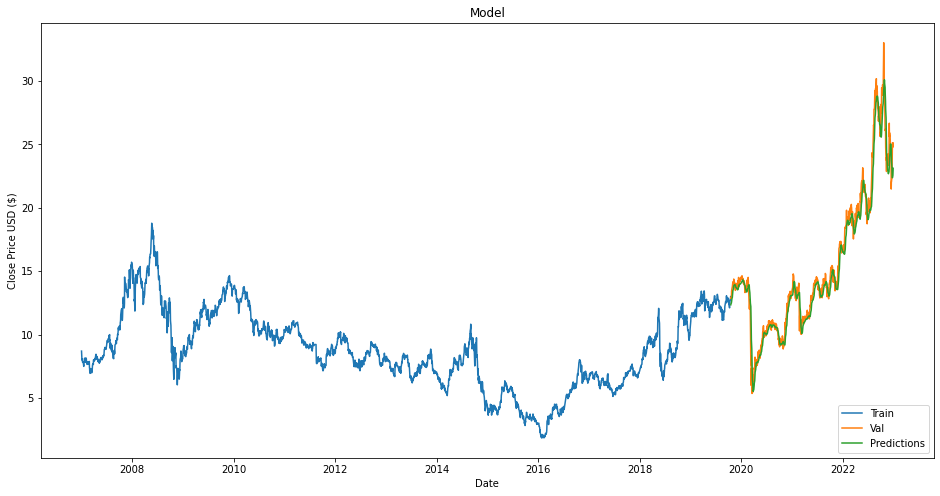

In [153]:
import matplotlib.pyplot as plt

data = dados.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_5656/1626216995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


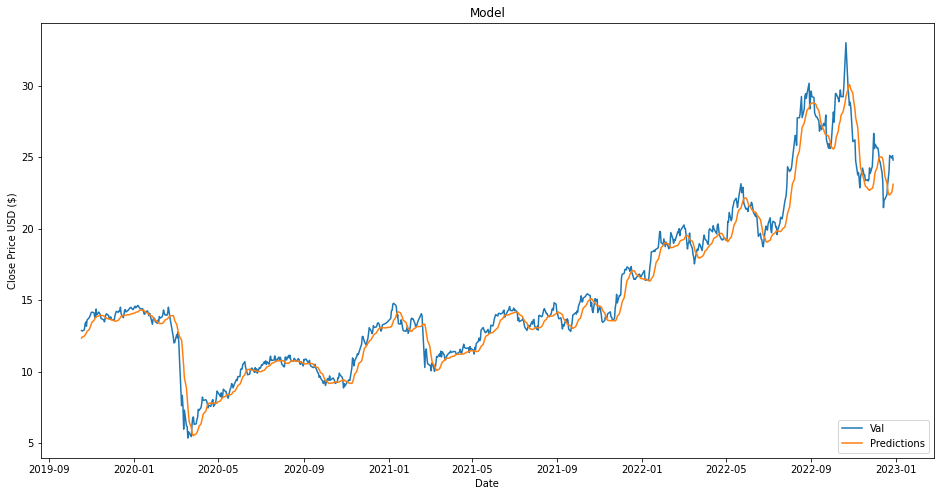

In [155]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
#there is something wrong in here. There is no way it predicts with this much accuracy data it has never seen.
#there is data leakage somewhere

In [70]:
#um cara falou que da merda no scaling. E se eu tirar o scaling?

In [71]:
#ele também só preve a proxima data, eu quero prever mais coisas, tipo 1 semana ou a data de 60 dias

In [74]:
values.shape

(3966,)

In [75]:
values.reshape(-1,1).shape

(3966, 1)

In [77]:
values[0: training_data_len].shape

(3173,)

In [112]:
import math
from sklearn.preprocessing import MinMaxScaler 
import numpy as np

close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

values=values.reshape(-1,1)
train_values=values[0: training_data_len]

scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_values)

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [137]:
test_values=values[training_data_len-60:]

test_data = scaler.transform(test_values)
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [138]:
x_test.shape

(793, 60, 1)

In [139]:
y_test.shape

(793, 1)

In [140]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=3)

Epoch 1/3
98/98 [==============================] - 17s 125ms/step - loss: 0.0066
Epoch 2/3
98/98 [==============================] - 12s 124ms/step - loss: 9.2320e-04
Epoch 3/3
98/98 [==============================] - 12s 123ms/step - loss: 8.7381e-04


In [141]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.05908948205608738

In [126]:
y_test.shape

(852, 1)

In [97]:
x_test.shape

(732, 60, 1)

In [92]:
values.shape

(792, 1)

/tmp/ipykernel_5656/4044787029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


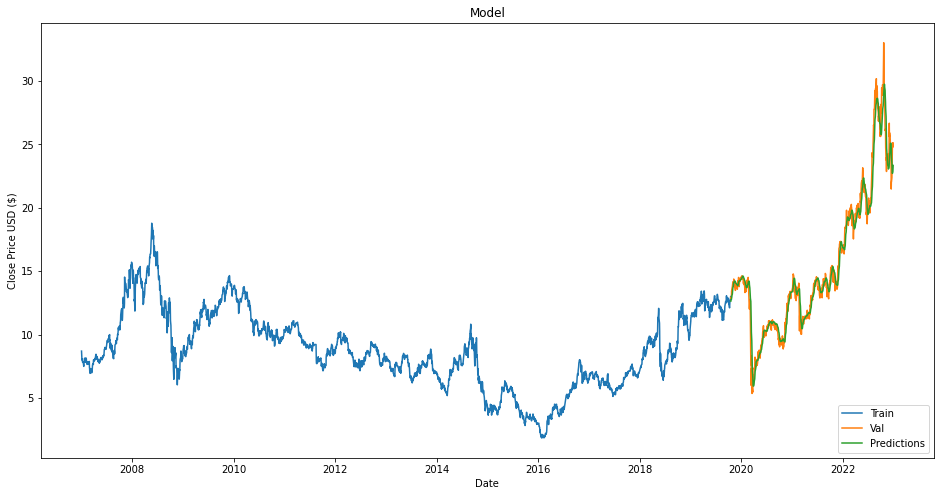

In [142]:
data = dados.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_5656/1626216995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


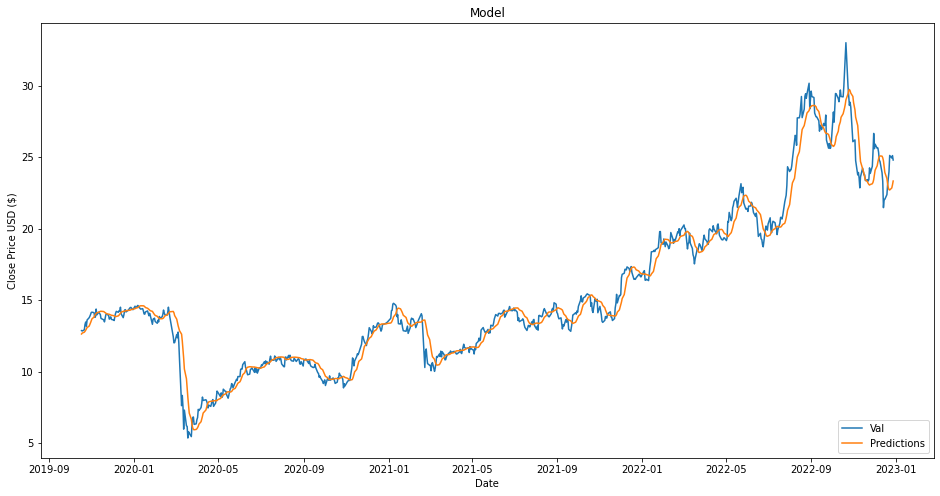

In [146]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [156]:
#looks the same to me. But I'd say its better to not leak data.